In [1]:
import sys
import glob
import pickle
import glob
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

In [2]:
def load_obj(name ):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [6]:
def prepare_avgdata(all_data):
    
    all_features_avg=[]
    all_artists=[]
    
    # Create lists of song names and features for each artist:
    for artist in all_data: 
        
        # load in the feature dictionary for the artist:
        data=load_obj(artist.replace('.pkl',''))
        print('loading {0}'.format(artist))
        
        songname=[] # will be a list of song names
        songfeat=[] # will be a list of dictionaries containing the feature data
        artists=[]  # will be a list of artists
        
        # extract out the features, song name and artist into separate lists:
        for song in data: 
            songfeat.append(data[song]) 
            songname.append(song)
        
        # add artist into masterlist:
        artists.append(artist.replace('_data.pkl','').replace('all_','').replace(path,''))

        # make a list of the feature names:
        feature_names=list(songfeat[0].keys()) 
        
        # make a list all the feature values for this artist:
        features=[] 
        for i in range(len(songfeat)):
            features.append(list(songfeat[i].values()))
            
        # append the average feature values for this artist into a master list:
        features_avg=np.mean(features, axis=0)
        all_features_avg.append(features_avg)
        
        # append the artist name for this artist into a master list:
        all_artists+=artists
        
    return all_features_avg, all_artists

In [9]:
path='./hacknight/data_5band/'
all_data=glob.glob(path+'/*.pkl')

In [10]:
all_features_avg, all_artists = prepare_avgdata(all_data)

loading ./hacknight/data_5band/all_TaylorSwift_data.pkl
loading ./hacknight/data_5band/all_ImogenHeap_data.pkl
loading ./hacknight/data_5band/all_TommyEmmanuel_data.pkl
loading ./hacknight/data_5band/all_Zero7_data.pkl
loading ./hacknight/data_5band/all_TheFlashbulb_data.pkl
loading ./hacknight/data_5band/all_Xmas_data.pkl
loading ./hacknight/data_5band/all_MichaelJackson_data.pkl
loading ./hacknight/data_5band/all_REM_data.pkl
loading ./hacknight/data_5band/all_FooFighters_data.pkl
loading ./hacknight/data_5band/all_Classical_data.pkl
loading ./hacknight/data_5band/all_PinkFloyd_data.pkl
loading ./hacknight/data_5band/all_BoardsOfCanada_data.pkl
loading ./hacknight/data_5band/all_AvrilLavigne_data.pkl


In [11]:
print(np.shape(all_features_avg))
dist=pdist(all_features_avg)
dist_matrix=squareform(dist)

(13, 55)


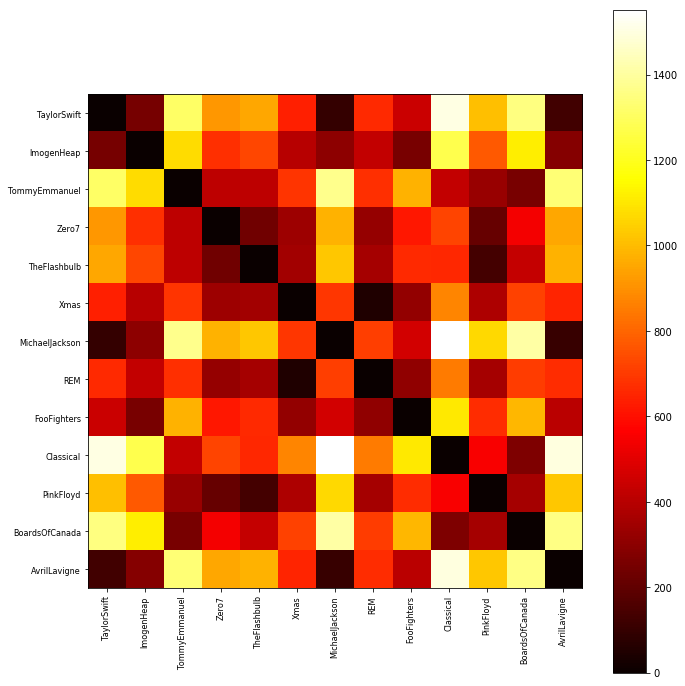

In [12]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
x=range(0,len(all_artists))
i=ax.imshow(dist_matrix, cmap='hot', interpolation='nearest')
plt.xticks(x,all_artists,rotation='vertical')
plt.yticks(x,all_artists)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)
fig.colorbar(i, orientation='vertical')
plt.tight_layout()
plt.savefig('Artist Similarity Matrix')
plt.show()